In [0]:
#Importing the pandas library to read our dataset
import pandas as pd

#Getting the train/test split package from sklearn for preparing our dataset to test and train the model with
from sklearn.model_selection import train_test_split

#Importing the numpy library to work with and manipulate the data
import numpy as np

In [2]:
#AssignmentQuestion1 a
#Reads a comma separated value (CSV) file
dataset = pd.read_csv('/content/drive/My Drive/SampleData/housing.csv')

#The path to your .csv file

dataset = dataset.dropna()

#View the first five rows of the dataset
print("Here are the first Ten records of the dataset:")

dataset.head(10)

Here are the first Ten records of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


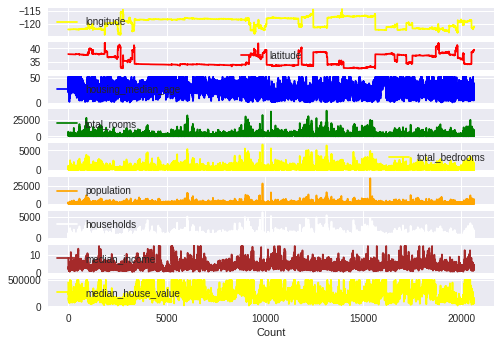

In [0]:
#AssignmentQuestion 1 b
#importing pandas
import pandas as pd
#importing pyplot module from matplotlib
from matplotlib import pyplot as plt
#using seaborn style
plt.style.use('seaborn')

#setting the values into a variable for each column
longitude = dataset['longitude']
latitude = dataset['latitude']
housing_median_age = dataset['housing_median_age']
total_rooms = dataset['total_rooms']
total_bedrooms = dataset['total_bedrooms']
population = dataset['population']
households = dataset['households']
median_income = dataset['median_income']
median_house_value = dataset['median_house_value']
ocean_proximity = dataset['ocean_proximity']

#subplots creates a figure and by default has axis for rows and columns to 1 

#Creating an image for each subplots
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(9)

#fig, ax1 = plt.subplots()
#fig, ax2 = plt.subplots()
#fig, ax3 = plt.subplots()
#fig, ax4 = plt.subplots()
#fig, ax5 = plt.subplots()
#fig, ax6 = plt.subplots()
#fig, ax7 = plt.subplots()
#fig, ax8 = plt.subplots()
#fig, ax9 = plt.subplots()
#fig, ax10 = plt.subplots()



#Providing the subplot with a label and color
ax1.plot(longitude, label = 'longitude', color='yellow')
ax2.plot(latitude, label = 'latitude', color='red')
ax3.plot(housing_median_age, label = 'housing_median_age', color='blue')
ax4.plot(total_rooms, label = 'total_rooms', color='green')
ax5.plot(total_bedrooms, label = 'total_bedrooms', color='Yellow')
ax6.plot(population, label = 'population', color='orange')
ax7.plot(households, label = 'households', color='white')
ax8.plot(median_income, label = 'median_income', color='brown')
ax9.plot(median_house_value, label = 'median_house_value', color='yellow')
#ax10.plot(ocean_proximity, label = 'ocean_proximity', color='pink')

#Giving legend details
ax1.legend()
#ax1.set_ylabel('longitude')
ax2.legend()
#ax2.set_ylabel('latitude')
ax3.legend()
#ax3.set_ylabel('Median house age')
ax4.legend()
#ax4.set_ylabel('total number of rooms')
ax5.legend()
#ax5.set_ylabel('total number of bedrooms')
ax6.legend()
#ax6.set_ylabel('total population')
ax7.legend()
#ax7.set_ylabel('total number of people per house')
ax8.legend()
#ax8.set_ylabel('median income')
ax9.legend()

ax9.set_xlabel('Count')


#automatic padding for the plot
#plt.tight_layout()

#saving the image as .png
fig.savefig('fig.png')
#show the plot
plt.show()

In [0]:
#AssignmentQuestion1 C
#Predicting the Median house value
Y = dataset['median_house_value']

#Y is predicted by other remaining columns
#selecting the Median_Income column from the longitude column
X = dataset.loc[:,'longitude':'median_income']

#X

In [0]:
#Splitting the dataset such that 30% is for testing and the remaining 70% for Training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#Converting the datasets to numpy arrays to work with the model
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

#Converting the testing data
x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [0]:
#Importing the pytorch library
#Also importing the 1D convolutional layer and as we are inputting 1D row of data, cant use 2D or 3D
import torch
from torch.nn import Conv1d

#importing max pooling layer
from torch.nn import MaxPool1d

#Import flatten layer
from torch.nn import Flatten

#Importing linear layer
from torch.nn import Linear

#Importing the ReLU activation function
from torch.nn.functional import relu

#Importing the TensorLoader and dataloader libraries from pytorch to work with the housing dataset
from torch.utils.data import DataLoader, TensorDataset

In [0]:
#The class must be a subclass of torch.nn.Module
class CnnRegressor(torch.nn.Module):

#Defining the initialization method
  def __init__(self, batch_size, inputs, outputs):

#Initializing the superclass and storing the parameters
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs

#Defining the input layer with the input size, kernel size and output size
    self.input_layer = Conv1d(inputs, batch_size, 1)

    #Defining a max pooling layer with a kernel size
    self.max_pooling_layer = MaxPool1d(1)

#Defining another convolutional layer
    self.conv_layer = Conv1d(batch_size, 128, 1)

#Defining a flatten layer
    self.flatten_layer = Flatten()

#defining a linear layer with inputs and output as the arguments
    self.linear_layer = Linear(128, 64)

#Defining the output layer    
    self.output_layer = Linear(64, outputs)

#Defining a method to feed inputs through the model
  def feed(self, input):

#Reshaping the entry so that it can be fed to the input layer
#Although 1D convolutional layer is used, it expects 3D array to process in a 1D fashion
    input = input.reshape((self.batch_size, self.inputs, 1))

    #Extracting the first layers output and running it through ReLU activation Layer
    output = relu(self.input_layer(input))

    #Getting the output of the max pooling layer
    output = self.max_pooling_layer(output)

    #Getting the output of the 2nd convolution layer and running it through ReLU activation function
    output = relu(self.conv_layer(output))

    #Extracting the output of flatten layer
    output = self.flatten_layer(output)

    #Getting the output of linear layer and then run it through the ReLU activation layer
    output = self.linear_layer(output)

    #Returning the output of the extracted output layer
    output = self.output_layer(output)
    return output


In [0]:
#Importing the Stochastic gradient descent package from pytorch for our optimizer
from torch.optim import SGD

#Importing the mean absolute error loss package from pytorch for our performance measure 
from torch.nn import L1Loss

#Importing the R^2 score package from pytorch's ignite for our score measure 
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

In [0]:

#Defining batch size that can be optimal as 64
batch_size = 64 

model = CnnRegressor(batch_size, X.shape[1], 1)

model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [0]:
#Creating a method for running the batches of data through the model created 
#Method returns average L1 Loss and R^2 score
def model_loss(model, dataset, train = False, optimizer = None):

  #cycling through the batches and getting the average L1 Loss
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0
  for input, output in iter(dataset):

    #Getting the model's prediction for training dataset
    predictions = model.feed(input)

    #Extracting model's loss
    loss = performance(predictions, output)

    #Getting the model's R^2 Score
    score_metric.update([predictions, output])
    score = score_metric.compute()

    if(train):
      
      #Clearing the error so as to not have it cummulate
      optimizer.zero_grad()

      #Computing the gradients for the optimizer
      loss.backward()

      #Using the optimizer to update model's parameters based on the gradients
      optimizer.step()

    #Storing the loss and updating the counter
    avg_loss += loss.item()
    avg_score += score
    count += 1

  return avg_loss / count, avg_score / count

In [0]:
#Defining the number of epochs
epochs = 10

#Defining the performance measure and optimizer
optimizer = SGD(model.parameters(), lr=1e-5)

#converting the training set into torch variables for our model using the GPU as floats.
#Reshaping to remove the warning that pytorch may provide
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

#Creating dataloader instance to work with our batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

#Start the training loop 
for epoch in range(epochs):

  #Cycling through the batches and getting average loss
  avg_loss, avg_r2_score = model_loss(model, loader, train=True, optimizer=optimizer)

  #Outputting the average loss
  print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " +str(avg_r2_score))


Epoch 1:
	Loss = 134095.50080577354
	R^2 Score = -2.0885939030041722
Epoch 2:
	Loss = 117010.05948710762
	R^2 Score = -1.2112951874950333
Epoch 3:
	Loss = 114302.30948710762
	R^2 Score = -0.9220070062688743
Epoch 4:
	Loss = 111288.25056053812
	R^2 Score = -0.803217370877611
Epoch 5:
	Loss = 108627.43609865471
	R^2 Score = -0.8255319453935777
Epoch 6:
	Loss = 103310.65745866031
	R^2 Score = -0.5932116193872701
Epoch 7:
	Loss = 103618.79803110987
	R^2 Score = -0.5099142567330811
Epoch 8:
	Loss = 101341.30493273542
	R^2 Score = -0.4715744931623503
Epoch 9:
	Loss = 99883.49637401906
	R^2 Score = -0.3283834309683446
Epoch 10:
	Loss = 97893.91973794842
	R^2 Score = -0.3276627215542522


In [0]:
#Testing the model
#Convert the testing set into torch variables for our model using the GPU as floats
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()

#Create dataloader instance to work with the batches
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

#output the average performance of the proposed model
avg_loss, avg_r2_score = model_loss(model, loader)
print("The model's L1 loss is: " + str(avg_loss))
print("the model's R^2 Score is: " + str(avg_r2_score))

The model's L1 loss is: 86459.35378289473
the model's R^2 Score is: -0.01782009631137726
